In [24]:
#úkol č. 6

import time
import hashlib

def aktualni_cas():   
    timestamp = int(time.time()) #sběr aktuálního času 
    return timestamp

def uhozy_klavesnice():
    keyboard_input = input("Zadejte náhodné úhozy do klávesnice: ") 
    return keyboard_input

def generuj_seminko():
    physical_data = aktualni_cas()
    user_interaction = uhozy_klavesnice()

    combined_data = str(physical_data) + str(user_interaction)
    combined_data_zakodovana = combined_data.encode()
    seed = hashlib.sha256(combined_data_zakodovana).digest() #hashovacího otisk

    return seed
seminko = generuj_seminko()
print("Vygenerované semínko:", seminko)

Zadejte náhodné úhozy do klávesnice: ncjdjamx
Vygenerované semínko: b'\x15\xc6-\x03S2M\x17\xfb\x8b\xa0\xaf.\xcb\xc32\x87C\xb9+\xc5\x86\x8d\xbc\xb9\x01\xf6a-l\xac\x88'


In [ ]:
#Úkol č. 5

import math
import time
from scipy import optimize

def fce1(x):
  return x**3 + x**2 - 1

def fce2(x):
  return math.e**(x-1) - 1

def fce3(x):
  return math.sin(x)-0.5


def bisekce(f,a,b,epsilon):  #Půlení intervalu

  zacatek_casu_bisekce = time.time()
  
  while (b - a) >= epsilon:
        c = (a + b) / 2
        if f(c) == 0.0:
            return c
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
  konec_casu_bisekce  = time.time()
  konecny_cas_bisekce=konec_casu_bisekce-zacatek_casu_bisekce

  return ((a + b) / 2), konecny_cas_bisekce
  
a=0.6
b=5
epsilon=0.0001

print(bisekce(fce1,a,b,epsilon))
print(bisekce(fce2,a,b,epsilon))
print(bisekce(fce3,a,b,epsilon))

def scipy_newton(f,a,b): #Newtonova metoda

  zacatek_casu_newton = time.time()
  vysledek= optimize.newton(f,(a+b)/2)
  konec_casu_newton=time.time()
  konecny_cas_newton=konec_casu_newton-zacatek_casu_newton
  
  return vysledek, konecny_cas_newton

print(scipy_newton(fce1,a,b))
print(scipy_newton(fce2,a,b))
print(scipy_newton(fce3,a,b))

(0.7548553466796875, 2.47955322265625e-05)
(0.9999786376953124, 1.6927719116210938e-05)
(2.618020629882812, 1.9311904907226562e-05)
(0.7548776662466928, 0.0007202625274658203)
(1.0, 0.00048279762268066406)
(2.617993877991494, 0.0002639293670654297)


In [26]:
#Úkol č. 8

import numpy as np

def f(x):
    return np.sin(x)

def adaptivni_derivace(f, x, h, tolerance):
    h_new = h
    derivative_old = (f(x + h) - f(x - h)) / (2 * h)
    error = 1  
    while error > tolerance:
        h = h_new
        derivative_new = (f(x + h) - f(x - h)) / (2 * h)
        error = np.abs(derivative_new - derivative_old)
        h_new = h * np.power(tolerance / error, 0.5)
        derivative_old = derivative_new
    return derivative_old

x = np.pi / 4
h = 0.1
tolerance = 0.000001
reseni_adaptivni_derivace = adaptivni_derivace(f, x, h, tolerance)

def staticka_derivace(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)
reseni_staticke_derivace = staticka_derivace(f, x, h)

def analyticka_derivace(x):
    return np.cos(x)
reseni_analyticke_derivace = analyticka_derivace(x)

print("Řešení derivace s adaptabilním krokem:", reseni_adaptivni_derivace)
print("Řešení statické derivace:", reseni_staticke_derivace)
print("Řešení analytické derivace:", reseni_analyticke_derivace)

Řešení derivace s adaptabilním krokem: 0.7059288589999413
Řešení statické derivace: 0.7059288589999413
Řešení analytické derivace: 0.7071067811865476


<ipython-input-26-d8d03b873748>:16: RuntimeWarning: divide by zero encountered in double_scalars
  h_new = h * np.power(tolerance / error, 0.5)


In [29]:
#úkol č. 9

from scipy import integrate
import math
import time

def fce1(x):
  return (x**3 + x**2 - 2)/2

def fce2(x):
  return math.e**(x**2) - 1

def fce3(x):
  return 6*math.sin(3*x+2)

def rie_int(fce,a,b,dx):

  t=time.time()
  vysledek=0
  while a<b:
    vysledek += dx * (fce(a) + fce(a+dx))/2
    a += dx
  return vysledek,(time.time()-t)

print(rie_int(fce1,0,5,1/100000))
print(rie_int(fce2,0,5,1/100000))
print(rie_int(fce3,0,5,1/100000))

def scipy_romberg(f,a,b):

  t=time.time()
  return integrate.romberg(f, a, b), (time.time()-t)

print(scipy_romberg(fce1,0,5))
print(scipy_romberg(fce2,0,5))
print(scipy_romberg(fce3,0,5))

(93.95907333615929, 0.22700190544128418)
(7354873832.664578, 0.20438790321350098)
(-0.2820246809333154, 0.2242445945739746)
(93.95833333333333, 0.0002701282501220703)
(7354153742.83951, 0.0006296634674072266)
(-0.2819669969910903, 0.0003902912139892578)


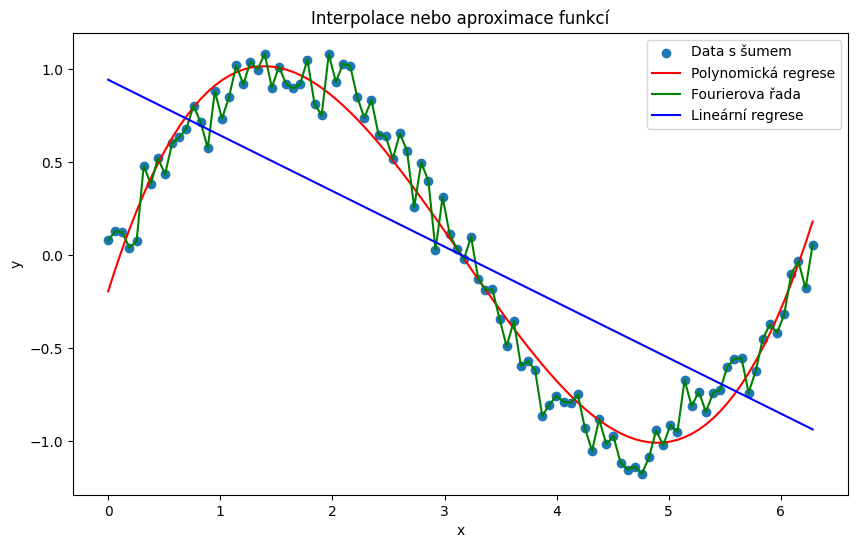

Součet čtverců rozdílů:  23.818751462108413


In [1]:
#Úkol č. 4

import numpy as np
import matplotlib.pyplot as plt


def fce(x):
    return np.sin(x) + np.random.normal(0, 0.1, len(x))

x = np.linspace(0, 2*np.pi, 100)
y = fce(x)


polynomial_coeffs = np.polyfit(x, y, 3) # Polynomická regrese
polynomial_approx = np.polyval(polynomial_coeffs, x)


fourier_coeffs = np.fft.fft(y) # Fourierova řada
fourier_approx = np.fft.ifft(fourier_coeffs)


linear_coeffs = np.polyfit(x, y, 1) # Lineární regrese
linear_approx = np.polyval(linear_coeffs, x)


plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data s šumem')
plt.plot(x, polynomial_approx, label='Polynomická regrese', color='r')
plt.plot(x, np.real(fourier_approx), label='Fourierova řada', color='g')
plt.plot(x, linear_approx, label='Lineární regrese', color='b')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolace nebo aproximace funkcí')
plt.show()

# Výpočet součtu čtverců rozdílů mezi odhadnutými a skutečnými hodnotami
sum_of_squares = np.sum((y - polynomial_approx)**2) + np.sum((y - np.real(fourier_approx))**2) + np.sum((y - linear_approx)**2)
print("Součet čtverců rozdílů: ", sum_of_squares)

In [13]:
#Úkol č. 7

import random

def modularni_mocnina(base, exponent, modulus):
    result = 1
    while exponent > 0:
        if exponent % 2 == 1:
            result = (result * base) % modulus
        base = (base * base) % modulus
        exponent //= 2
    return result

def miller_rabin_test(n, k):
    if n == 2 or n == 3:
        return True
    if n < 2 or n % 2 == 0:
        return False

    r = 0
    s = n - 1
    while s % 2 == 0:
        r += 1
        s //= 2

    for _ in range(k):
        a = random.randint(2, n - 1)
        x = modularni_mocnina(a, s, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(r - 1):
            x = (x * x) % n
            if x == n - 1:
                break
        else:
            return False

    return True

def is_prime(n, k):
    if n <= 1:
        return False
    if n <= 3:
        return True

    return miller_rabin_test(n, k)

n = 101
k = 10

if is_prime(n, k):
    print(f"{n} je prvočíslo.")
else:
    print(f"{n} není prvočíslo.")

101 je prvočíslo.
